In [1]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
from __future__ import print_function

In [2]:
cifar10_dir = 'datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

## 数据的格式 

数据集的具体描述见[CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html)的官方网站

**data** -- a 10000x3072 numpy array of uint8s. Each row of the array stores a **32x32** colour image. 

The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue.
The image is stored in row-major order, so that the first 32 entries of the array are the red channel values 
of the first row of the image.

**labels** -- a list of 10000 numbers in the range 0-9. 
The number at index i indicates the label of the ith image in the array data.

**label_names** -- a 10-element list which gives meaningful names to the numeric labels in the labels array 
described above. For example, label_names[0] == "airplane", label_names[1] == "automobile", etc.

In [3]:
print('训练集维度Training data: ', X_train.shape)
print('训练集维度Training labels: ', y_train.shape)
print('测试集维度Test data shape: ', X_test.shape)
print('测试集维度Test labels shape: ', y_test.shape)

训练集维度Training data:  (50000, 32, 32, 3)
训练集维度Training labels:  (50000,)
测试集维度Test data shape:  (10000, 32, 32, 3)
测试集维度Test labels shape:  (10000,)


## 数据可视化

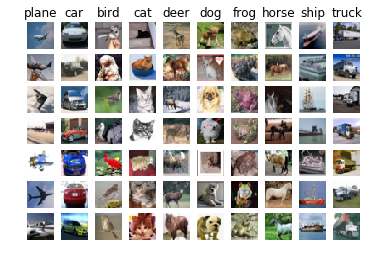

In [4]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

## 划分原数据集的一个子集，让数据集小一点，提高调试的效率

In [20]:
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

In [29]:
X_train=np.reshape(X_train,(X_train.shape[0],-1))
X_test=np.reshape(X_test,(X_test.shape[0],-1))
print('训练集子集的维度Training data: ', X_train.shape)
print('测试集子集的维度Test data shape: ', X_test.shape)

训练集子集的维度Training data:  (5000, 3072)
测试集子集的维度Test data shape:  (500, 3072)


In [34]:
#from classifiers.K_Nearest_Neighbor import *
from classifiers import K_Nearest_Neighbor
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)